In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append(os.path.abspath(".."))

from src.ingestion.load_kaggle import load_data
import matplotlib.pyplot as plt

df = load_data("../data/raw/creditcard.csv")


c:\Users\PC\Desktop\Programacion\Estudio\fraud-detection\.venv\Lib\site-packages\pandera\_pandas_deprecated.py:146: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


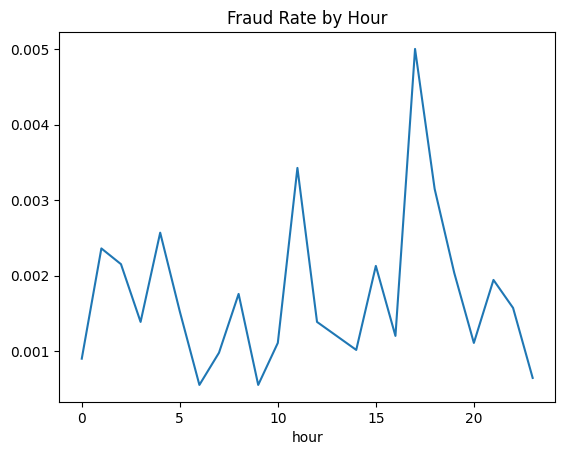

In [3]:
df["hour"] = df["ts"].dt.hour
df["day_of_week"] = df["ts"].dt.dayofweek

df.groupby("hour")["label"].mean().plot(title="Fraud Rate by Hour")
plt.show()


In [4]:
df = df.set_index("ts").sort_index()

df["txn_count_1h"] = (
    df.groupby("user_id")["label"]
      .rolling("1h")
      .count()
      .reset_index(level=0, drop=True)
)

df = df.reset_index()

df.groupby("txn_count_1h")["label"].mean().head(10)


txn_count_1h
1.0    0.001877
2.0    0.001595
3.0    0.001319
4.0    0.002293
5.0    0.003320
6.0    0.000000
7.0    0.000000
8.0    0.000000
9.0    0.000000
Name: label, dtype: float64

In [5]:
df.head()

,ts,transaction_id,user_id,amount,merchant,country,device_id,payment_method,label,hour,day_of_week,txn_count_1h
0,2024-01-01 00:00:00,0,1206,149.62,uber,BR,4275,debit,0,0,0,1.0
1,2024-01-01 00:00:01,1,395,2.69,walmart,BR,7758,credit,0,0,0,1.0
2,2024-01-01 00:00:02,2,3047,378.66,amazon,MX,6345,credit,0,0,0,1.0
3,2024-01-01 00:00:03,3,1033,123.50,netflix,CO,153,debit,0,0,0,1.0
4,2024-01-01 00:00:04,4,3111,69.99,amazon,CO,4985,credit,0,0,0,1.0


In [7]:
from src.features.pipeline import build_features

df_feat = build_features(df)

df_feat[[
    'hour','day_of_week','txn_count_1h','txn_sum_24h'
]].sample(10)

,hour,day_of_week,txn_count_1h,txn_sum_24h
119031,9,1,2.0,15.0
34496,9,0,1.0,4.0
237792,18,2,1.0,21.0
50168,13,0,2.0,12.0
97263,3,1,2.0,14.0
24018,6,0,2.0,5.0
255648,23,2,1.0,22.0
66071,18,0,1.0,17.0
89494,0,1,3.0,24.0
50056,13,0,3.0,8.0
